In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import bernoulli
import seaborn as sb
from numpy.linalg import matrix_power
from numpy.linalg import eig

# Part 1

In [200]:
#Create directed graph and run hits hubs and authorities
G = nx.read_edgelist("/Users/jacobeverly/Documents/Graph Science/HW6/wikispeedia.edgelist", create_using = nx.DiGraph)
hub, auth = nx.hits(G)
max_value1 = max(auth, key=auth.get)
print('Highest authority value:',max_value1)
max_value2 = max(hub, key=hub.get)
print('Highest hub value:',max_value2)


Highest authority value: Driving_on_the_left_or_right
Highest hub value: United_States


In [249]:
# Scatter Plot for nx.pagerank
prnx = nx.pagerank(G, alpha = 0.9)
prnxn = list(prnx.values())
prnxn = np.array(prnxn)
n= len(G.nodes)
nlin = np.linspace(0,n,n)
damp = 0.1

def PageRank(damp,G,t):
    N = len(G.nodes)
    W = np.full((N, N), 1./N)
    
    for ind_i, i in enumerate(G.nodes):
        N_out = len(list(G.successors(i)))
        for ind_j, j in enumerate(G.nodes()):
            edge = (i, j)
            if N_out > 0 and edge in G.edges:
                W[ind_i,ind_j] = (damp/N) + ((1-damp)/N_out)
            elif N_out > 0 and edge not in G.edges:
                W[ind_i,ind_j] = damp/N
                
    print('first part done.')

    evalues, lvecs = np.linalg.eig(W.T)
    return evalues, lvecs


In [250]:
m = PageRank(damp,G,100)

first part done.


In [251]:
ei_1 = m[1][:len(G.nodes),0]
res = np.real(ei_1)/np.linalg.norm(ei_1, 1)

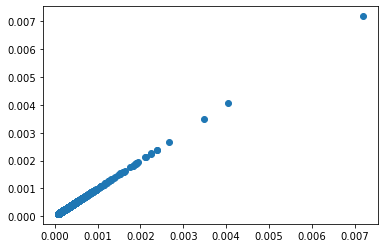

In [252]:
plt.scatter(res, prnxn)

# Part 2

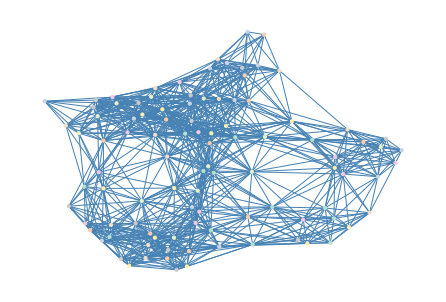

In [8]:
#Creates the random geometric graph
G = nx.random_geometric_graph(100, radius = 0.3, seed = 96845)
nx.draw(G,node_size =10, edge_color = "#4682b4", node_color = range(len(G)) , cmap = plt.cm.Pastel2)

100


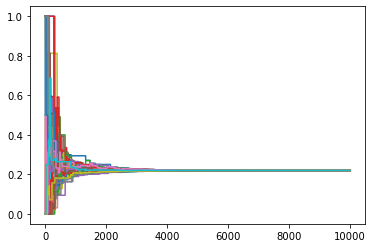

In [23]:
def gossipprotocol(G,T):
    
    N = G.number_of_nodes()
    print(N)
    X = np.empty([N,T])
#Use bernouilis equation given the parameters in the question
    for i in range(N):
        X[i,:] = np.random.binomial(n=1, p= 0.2)
#Gossiping protocol conditions       
    for t in range(T):
        RanE = np.random.choice(range(len(G.edges)))
        it,jt = list(G.edges)[RanE]
        
        for node in G.nodes:
            if node == it or node == jt:
                X[node, t] = (X[it, t-1] + X[jt, t-1])/2
            else:
                X[node, t] = X[node, t-1]
                
#Plot distribuition               
    for k in range(N):
        plt.plot(range(T), X[k, :])
    
    return (plt.show())
        
gossipprotocol(G,10000)
    